# Group 32 Project Proposal 

### Carol Dong, Aria Donthineni, Grace Ellis, Nao Kawano

### Introduction

Heart disease is considered one of the leading causes of deaths in the US and costs billions in terms of healthcare and loss of productivity. There are many factors that could lead to an increase in developing heart disease. High cholesterol can lead to build up in the arteries of the heart, reducing blood flow. And high blood pressure damages the lining of arteries which makes the heart susceptible to buildup of plaque (Centers for Disease Control, 2022).  Age is another cause, as the older a person is, the higher the risk they are to gain heart diseases (US Department of Health, n.d.). 

This database uses data on 13 attributes of patients from a Cleveland clinic to predict the presence of heart disease. A model was created from this data and the accuracy was then tested on patients in Hungary, California, and Switzerland. 

Thus we shall be addressing the question: *What is the severity of the heart disease determined by the patient’s age, cholesterol, and resting blood pressure?* 



In [1]:
#importing libaries 
library(tidyverse)
library(tidymodels)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [19]:
#wrangling and tidying the data 
set.seed(1) 

heart_diseases<- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                         col_names= c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))

#heart_diseases$sex[heart_diseases$sex == 1] <- "Male"
#heart_diseases$sex[heart_diseases$sex == 0] <- "Female"

heart_diseases<- heart_diseases |> 
    mutate(diagnosis = ifelse (is.na(num), NA, (num>0))) |>
    mutate(sex= as_factor(sex), cp= as_factor(cp), fbs= as_factor(fbs), 
           restecg= as_factor(restecg), exang= as_factor(exang), 
           slope= as_factor(slope), thal= as_factor(slope), num=as_factor(num),
            diagnosis= as_factor(diagnosis))

#spliting dataframe into training and testing 
heart_split<- initial_split(heart_diseases, prop= 0.75, strata= num)
heart_training<- training(heart_split)
heart_test<- testing(heart_split)

head(heart_training)


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<chr>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,3,0,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0,FALSE
56,0,2,140,294,0,2,153,0,1.3,2,0.0,2,0,FALSE
57,1,3,150,168,0,0,174,0,1.6,1,0.0,1,0,FALSE
49,1,2,130,266,0,0,171,0,0.6,1,0.0,1,0,FALSE
64,1,1,110,211,0,2,144,1,1.8,2,0.0,2,0,FALSE


In [23]:
#summarizing table 

heart_summary<- heart_training |>
    group_by(diagnosis) |>
    summarize(mean_age= mean(age), min_age= min(age), max_age= max(age),
              mean_bp= mean(trestbps), min_bp = min(trestbps), max_bp= max(trestbps),
              mean_th= mean(thalach), min_th = min(thalach), max_th= max(thalach),
              number_patients= n())
heart_summary
        

diagnosis,mean_age,min_age,max_age,mean_bp,min_bp,max_bp,mean_th,min_th,max_th,number_patients
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
FALSE,52.68548,29,76,129.7339,94,180,158.9194,105,202,124
TRUE,56.48039,35,77,133.9020,100,192,138.4118,71,195,102


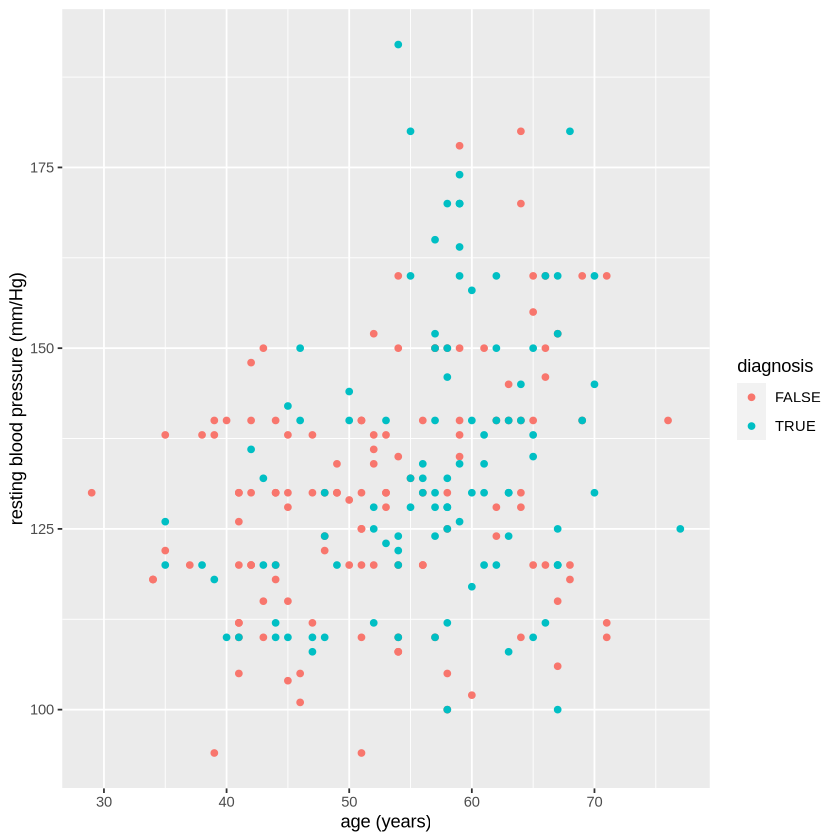

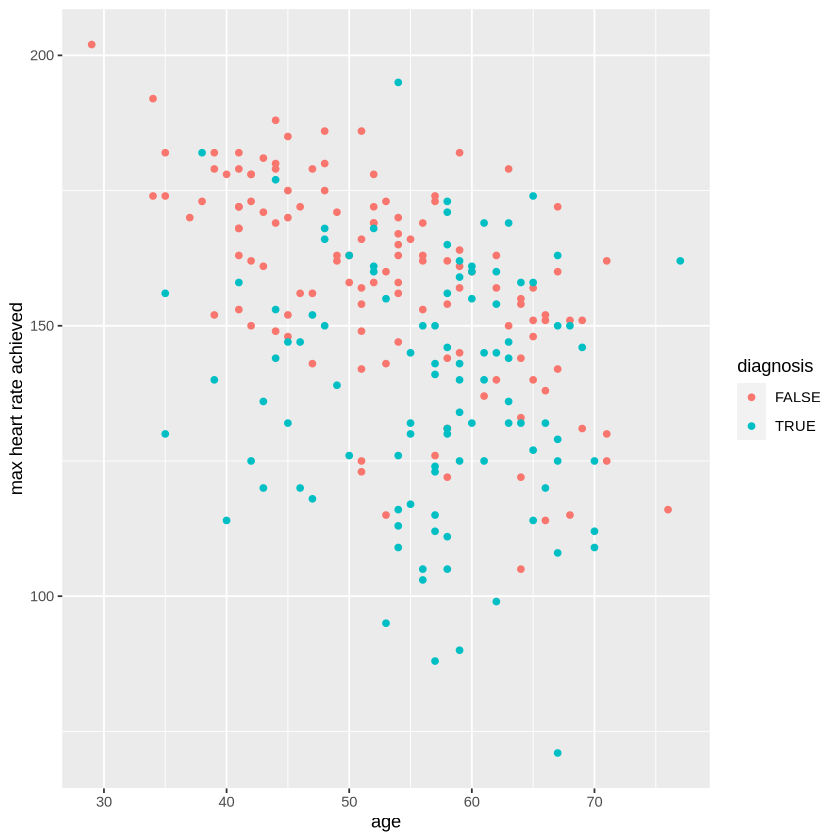

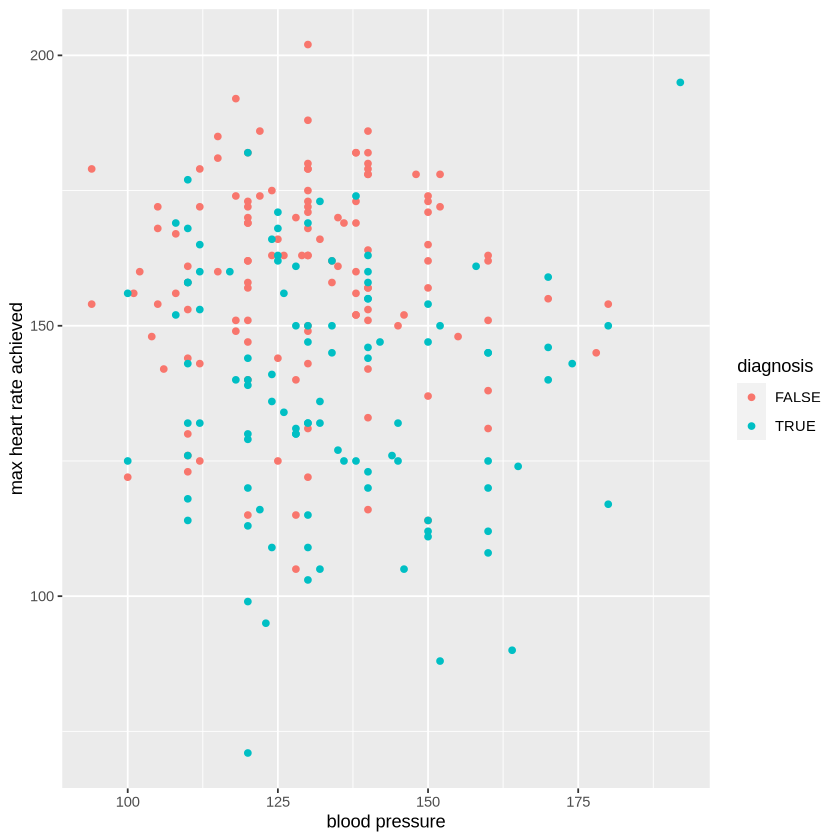

In [22]:
#visualzing the data 


plot_1<- ggplot(heart_training, aes(x=age, y=trestbps)) +
    geom_point(aes(color=diagnosis))+
    labs(x="age (years)", y="resting blood pressure (mm/Hg)", color= "diagnosis")

plot_2<- ggplot(heart_training, aes(x=age, y=thalach)) +
    geom_point(aes(color=diagnosis))+
    labs( x="age",y="max heart rate achieved", color= "diagnosis")

plot_3<- ggplot(heart_training, aes(x=trestbps, y=thalach)) +
    geom_point(aes(color=diagnosis))+
    labs(x="blood pressure", y="max heart rate achieved", color= "diagnosis")

plot_1
plot_2
plot_3




### Methods

The heart disease data set ranks the severity of heart disease on a scale from 0 to 4, with 0 being no presence of heart disease and 4 being the greatest presence of heart disease. We will manipualte the data so that we classify based on a diagnosis (1-4) or no diagnosis (0). 
After we loaded our data, we used the initial_split() function to split the data so 75% was training and 25% was testing. We selected three variables to tests: age, maximum heart rate achieved, and resting blood pressure. From here, the data was then summarized in a data table to see the mean, minimum, and maximum of each variable shown. They were then visuzlized into scatter plots colored by diagnosis.  



### Outcomes and Significance 

The ability to predict the severity of heart disease early in individuals, this would reduce the cases that progressed untreated to a greater severity. The creation of a model that allows a large variety of variable to be analyzed by a computer would reduce the strain on doctors, for the diagnosis of heart disease. 


### Bibliography

Centers for Disease Control and Prevention. (2022, September 8). Heart disease and stroke. Centers for Disease Control and Prevention. https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm#:~:text=Leading%20risk%20factors%20for%20heart,unhealthy%20diet%2C%20and%20physical%20inactivity 

U.S. Department of Health and Human Services. (n.d.). Heart health and aging. National Institute on Aging. https://www.nia.nih.gov/health/heart-health/heart-health-and-aging#:~:text=Adults%20age%2065%20and%20older,risk%20of%20developing%20cardiovascular%20disease 